<h2>Study of percentage corrosion in 3 experiments with aluminium sheet</h2>

<p>data:</p>
<p>3 sheets of aluminium with 60um of thickness and 0,5 cm2 of area</p>
<p>They were left for a while in a solution of NaCl 1M or 0,05M with a current until the plate perforation</p>

In [1]:
import numpy as np 
import cv2 
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline

Function to treat the images, the logic is threshold between pixels 0 (black) and 255 (white), 0 is points of corrosion and 255 the metal

In [44]:
def corroded_area(imagem):
    img16 = cv2.imread(imagem)
    img = (img16/127).astype('uint8')
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    gray = cv2.GaussianBlur(gray, (7, 7), 0)
    th, dst = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY)
    idx, counts = np.unique(dst, return_counts=True)
    dic = dict(zip(idx, counts))
    rate = round(100*dic[0]/sum(counts),2)
    # cv2.imwrite(filename=(imagem+'.jpg'),img= dst) # to create the images files
    return f'{rate} %'

In [3]:
img1 = cv2.imread('./files/1MNaCl-10-mA.jpg')
# img1 = cv2.resize(img1,(0,0), None, 1.25,1.25)
img12 = cv2.imread('./files/1MNaCl-10-mA.jpg.jpg')
# img12 = cv2.resize(img12,(0,0), None, 1.25,1.25)
im1 = Image.fromarray(np.vstack((img1,img12)))

In [4]:
img2 = cv2.imread('./files/1MNaCl-20mA.jpg')
# img2 = cv2.resize(img2,(0,0), None, 1.25,1.25)
img22 = cv2.imread('./files/1MNaCl-20mA.jpg.jpg')
# img22 = cv2.resize(img22,(0,0), None, 1.25,1.25)
im2 = Image.fromarray(np.vstack((img2,img22)))

In [5]:
img3 = cv2.imread('./files/005MNaCl-10mA.jpg')
# img3 = cv2.resize(img3,(0,0), None, 1.25,1.25)
img32 = cv2.imread('./files/005MNaCl-10mA.jpg.jpg')
# img32 = cv2.resize(img32,(0,0), None, 1.25,1.25)
im3 = Image.fromarray(np.vstack((img3,img32)))

Images in the upper region are untreated, and those below were treated with the openCV library

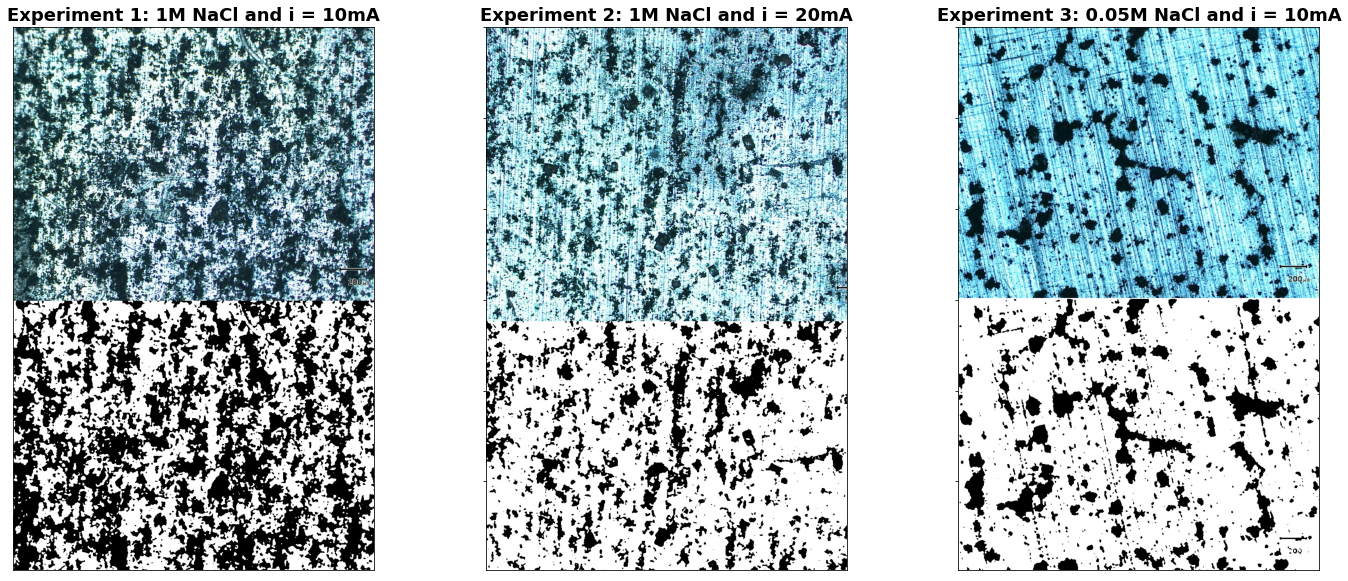

In [6]:
fig, ax = plt.subplots(nrows=1,ncols=3, figsize=(24,10),sharex=True,sharey=True)
fig1 = ax[0].imshow(im1)
fig2 = ax[1].imshow(im2)
fig3 = ax[2].imshow(im3)
fontdict=dict(fontsize= 18,
 fontweight = 'bold')
ax[0].set_title('Experiment 1: 1M NaCl and i = 10mA', fontdict=fontdict)
ax[1].set_title('Experiment 2: 1M NaCl and i = 20mA',fontdict=fontdict)
ax[2].set_title('Experiment 3: 0.05M NaCl and i = 10mA',fontdict=fontdict)
fig1.axes.get_xaxis().set_visible(False)
fig1.axes.get_yaxis().set_visible(False)
fig2.axes.get_xaxis().set_visible(False)
fig3.axes.get_xaxis().set_visible(False)
plt.show()

In [45]:
experiment1 = corroded_area('./files/1MNaCl-10-mA.jpg')
experiment2 = corroded_area('./files/1MNaCl-20mA.jpg')
experiment3 = corroded_area('./files/005MNaCl-10mA.jpg')

Percentage of corroded area for each experiment

In [46]:
print("experiment 1:", experiment1)
print("experiment 2:", experiment2)
print("experiment 3:", experiment3)

experiment 1: 49.49 %
experiment 2: 22.99 %
experiment 3: 19.0 %


In [60]:
sheet_area = 0.5
pits_area1=round(sheet_area*(float(experiment1.split()[0])),2)
pits_area2=round(sheet_area*(float(experiment2.split()[0])),2)
pits_area3=round(sheet_area*(float(experiment3.split()[0])),2)

Corroded area

In [61]:
print('experiment 1 (cm2):',pits_area1)
print('experiment 2 (cm2):',pits_area2)
print('experiment 3 (cm2):',pits_area3)

experiment 1 (cm2): 24.75
experiment 2 (cm2): 11.49
experiment 3 (cm2): 9.5
